In [5]:
import skimage # skimage is an image processing library
import matplotlib.pyplot as plt # matplotlib provides plot functions similar to MATLAB
import numpy as np # numpy provides efficient matrix implementation in python
from scipy import ndimage, stats, signal # scipy provides scientific computing functions
from IPython.html.widgets.interaction import interact 
# interact function can create an interactive interface to allow user to manipulate parameters and see the result, 
# similar to "Manipulate" in Mathematica

import math

%matplotlib inline

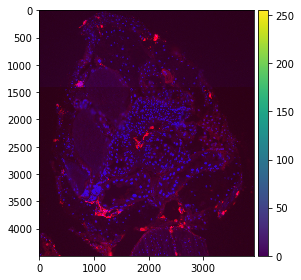

In [10]:
conditioned_raw = skimage.io.imread("Conditioned_1D_2_20x.jpg")
starved_raw = skimage.io.imread("Starved_1B_4_20x.jpg")
#skimage.io.imshow(conditioned_raw)
skimage.io.imshow(starved_raw)

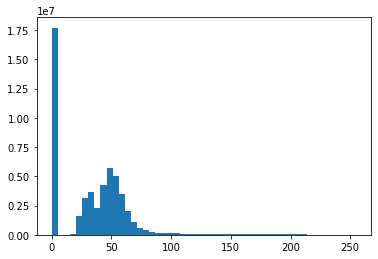

In [15]:
histCount, edge, tmp = plt.hist(starved_raw.ravel(), bins=50)

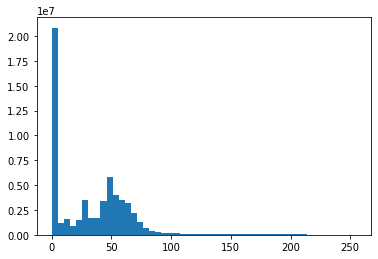

In [46]:
histCount, edge, tmp = plt.hist(conditioned_raw.ravel(), bins=50)

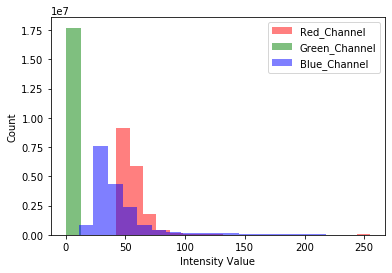

In [28]:

_ = plt.hist(starved_raw[:, :, 0].ravel(), bins = 20, color = 'red', alpha = 0.5)
_ = plt.hist(starved_raw[:, :, 1].ravel(), bins = 20, color = 'Green', alpha = 0.5)
_ = plt.hist(starved_raw[:, :, 2].ravel(), bins = 20, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

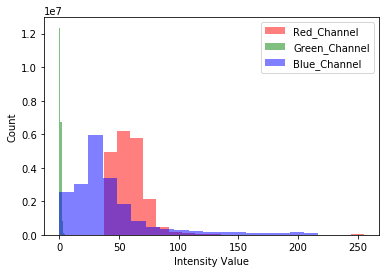

In [29]:
_ = plt.hist(conditioned_raw[:, :, 0].ravel(), bins = 20, color = 'red', alpha = 0.5)
_ = plt.hist(conditioned_raw[:, :, 1].ravel(), bins = 20, color = 'Green', alpha = 0.5)
_ = plt.hist(conditioned_raw[:, :, 2].ravel(), bins = 20, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

In [59]:
from skimage import color
conditioned_gray = color.rgb2gray(conditioned_raw)
starved_gray = color.rgb2gray(starved_raw)

0.07254596660539216


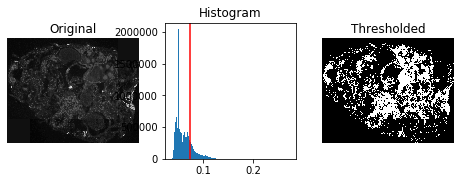

In [61]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(conditioned_gray)
print(thresh)
binary = conditioned_gray > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(conditioned_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(conditioned_gray.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

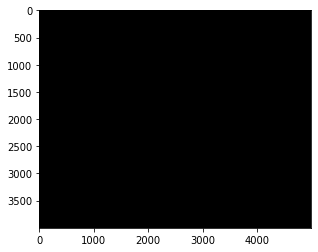

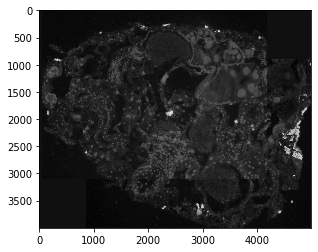

In [68]:
from skimage import segmentation
clean_border = segmentation.clear_border(binary)
plt.figure() 
plt.imshow(clean_border, cmap='gray') 
plt.figure() 

plt.imshow(conditioned_gray, cmap='gray') 

plt.contour(clean_border, [0.5]) 
edges = segmentation.mark_boundaries(conditioned_gray, clean_border.astype(np.int))

In [69]:
edges = segmentation.mark_boundaries(conditioned_gray, clean_border.astype(np.int))

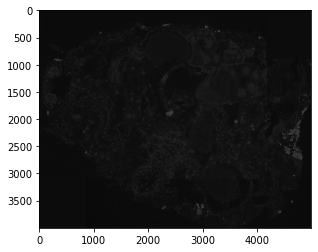

In [71]:
plt.imshow(edges)